# Ontology statistics

In [1]:
from graphai.core.ontology.data import OntologyData, db_results_to_pandas_df
from db_cache_manager.db import DB
from graphai.core.common.config import config
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_manager = DB(config['database'])

In [3]:
ontology_data = OntologyData()
ontology_data.load_data()

Edge counts computed
1497301 1497301 1497301


## Category concept counts

In [4]:
category_concept_df = ontology_data.get_category_concept_table()

Total # of concepts:

In [12]:
category_concept_df.shape[0]

37316

In [8]:
category_concept_counts = category_concept_df.groupby("from_id").apply("count").sort_values("to_id", ascending=False)

Non-empty categories:

In [40]:
category_concept_counts.shape[0]

1140

Most populated categories:

In [11]:
category_concept_counts.head(50)

,to_id
from_id,
topics-in-psychiatry,287
high-level-programming-languages,260
abstract-algebra,257
organometallic-chemistry,247
graph-theory,234
immune-system,234
topics-in-endocrinology,231
stellar-astronomy,228
cancer,226


Distribution of categories by concept count:

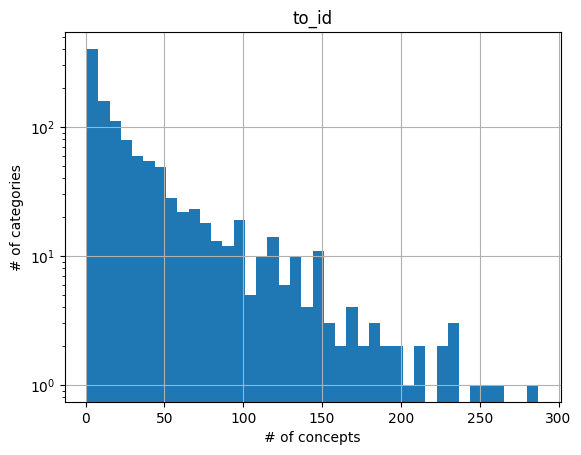

In [18]:
category_concept_counts.hist(bins=40)
plt.yscale("log")
plt.ylabel("# of categories")
plt.xlabel("# of concepts")
plt.show()

Empty categories:

In [35]:
all_categories = ontology_data.get_category_to_category()
all_d4_categories = {x['child_id'] for x in all_categories}.difference({x['parent_id'] for x in all_categories})
nonempty_categories = set(category_concept_df.from_id.values.tolist())
missing_categories = all_d4_categories.difference(nonempty_categories)

In [36]:
len(missing_categories)

755

In [37]:
missing_non_generic = [x for x in missing_categories if 'topics-' not in x and 'entities-' not in x]

In [38]:
len(missing_non_generic)

451

In [39]:
sorted([x for x in missing_categories if 'topics-' not in x and 'entities-' not in x])

['additive-number-theory',
 'administrative-law',
 'adult-education',
 'aeroacoustics',
 'aeronomy',
 'aesthetic-representation',
 'aesthetic-taste',
 'agricultural-economics',
 'agroecology',
 'algaculture',
 'algebraic-statistics',
 'algorithmics',
 'anthropological-linguistics',
 'anti-politics',
 'applied-ethics',
 'approximation-theory',
 'architectural-design-values',
 'architecture-criticism',
 'astrometry',
 'astrophysical-plasma',
 'atmospheric-methane',
 'atmospheric-physics',
 'attention-economics',
 'authority',
 'autonomous-robots',
 'bacteriology',
 'behavioral-neuroscience',
 'behavioral-psychology',
 'belle-experiment',
 'biological-oceanography',
 'biomimetics',
 'biomolecular-engineering',
 'bionics',
 'bioorganic-chemistry',
 'biophysical-chemistry',
 'biorobotics',
 'biosphere',
 'blended-learning',
 'brutalist-architecture',
 'calorimetry',
 'card-games',
 'cardiac-imaging',
 'categorical-logic',
 'cell-physiology',
 'cellular-automatons',
 'censorship',
 'centrifu

## OpenAlex concepts

In [45]:
import json
openalex_all = json.load(open('openalex_concepts.json', 'r'))
openalex_concept_ids = {str(x['wikipedia_id']) for x in openalex_all}

In [46]:
all_ontology_concepts = set(category_concept_df['to_id'].values.tolist())
len(all_ontology_concepts), len(openalex_concept_ids), len(openalex_concept_ids.intersection(all_ontology_concepts)), len(openalex_concept_ids.difference(all_ontology_concepts))

(37316, 58720, 28938, 29782)

So basically half the OpenAlex concepts are now in the ontology and half remain to be added.